# IRIS - Connection I

![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=2021)

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

## **length끼리, width끼리**

In [7]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [8]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [9]:
tr_x_l.shape, tr_x_w.shape

((120, 2), (120, 2))

In [10]:
te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

## One-hot Encoding

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)

In [13]:
train_y.shape

(120, 3)

## Modeling : multi-input & Concatenate layer

In [14]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [15]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_l = Input( shape=(2,) )
hl_l = Dense(2, activation=relu)(il_l)

il_w = Input( shape=(2,) )
hl_w = Dense(2, activation=relu)(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation=softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

## 모델 시각화

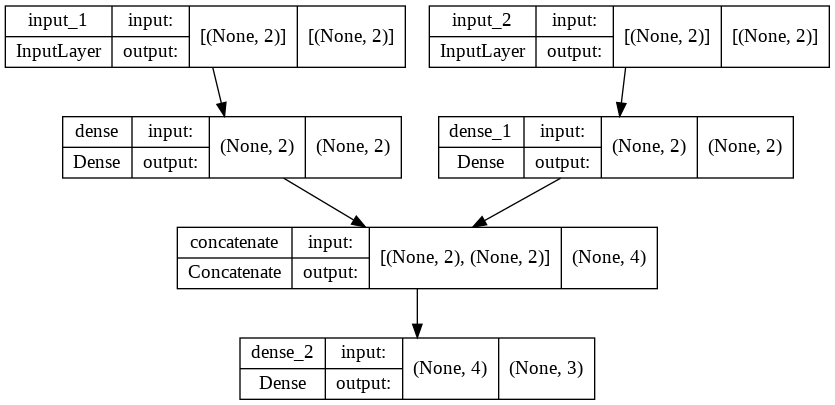

In [16]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [17]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.15,
          epochs=1000, verbose=1, callbacks=[es])

---
---
---
---
---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [53]:
iris = load_iris()

x = iris.data
y = iris.target

In [54]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [74]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=2022)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

In [75]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

train_x = mm_scaler.fit_transform(train_x)
test_x = mm_scaler.transform(test_x)

train_x = pd.DataFrame(train_x, columns=iris.feature_names)
test_x = pd.DataFrame(train_x, columns=iris.feature_names)

## **length끼리, width끼리**

In [76]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [77]:
tr_x_l = train_x.loc[:, ['sepal length (cm)','petal length (cm)']]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)']]
te_x_l = test_x.loc[:, ['sepal length (cm)','petal length (cm)']]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)']]
tr_x_l.shape, tr_x_w.shape, te_x_l.shape, te_x_w.shape

((120, 2), (120, 2), (120, 2), (120, 2))

## One-hot Encoding

In [78]:
set(train_y), np.unique(train_y)

({0, 1, 2}, array([0, 1, 2]))

In [79]:
len_y = len(np.unique(train_y))

train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

## Modeling : multi-input & Concatenate layer

In [85]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_l = Input(shape=(2,))
hl_l = Dense(2, activation='swish')(il_l)

il_w = Input(shape=(2,))
hl_w = Dense(2, activation='swish')(il_w)

cl = Concatenate()([il_l, il_w])
ol = Dense(3, activation='softmax')(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

In [86]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 4)            0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 3)            15          ['concatenate[0][0]']        

## 모델 시각화

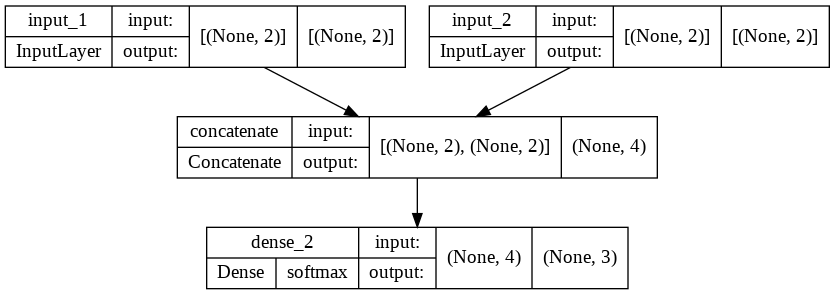

In [88]:
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True, show_)

## 학습 시켜보기!

In [82]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.15,
          epochs=1000, verbose=1, callbacks=[es])